# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosed to use the adultDataSet with the census data stored in censusData.csv
2,3. Since I will be performing unsupervised learning, my problem does not have a label. The type of unsupervised learning problem I will be performing is clustering
4. The features I will be considering are: age, workclass, education-num, race, sex_selfID, capital_gan, capital_loss, income_binary, native-country, occupation, and hours_per_week.
5. The goal of the clustering model I will be producing is to define groups of people in the census data based on shared socioeconomic factors. A company may want to investigate what socioeconomic factors contribute to the grouping of these idividuals, so they can identify areas to include for income improvement programs to close socioeconomic gaps.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
print("df shape: ")
print(str(df.shape))
print("-----------------------------------")
print("df columns:")
print(str(df.columns))
print("-----------------------------------")
print("df column types: ")
print(str(df.dtypes))
print("-----------------------------------")
print("nan count per column:")
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)
print("-----------------------------------")
print("unique values count per column")
print(df.nunique())
print("-----------------------------------")
# the purpose of this is to determine whether I would have to do any value standardization. 
# for example: some entries may have the category capitalized, while other entries may be not capitalized,
# but i would ultimately want to consider these columns as the same. 
print("unique values in specific columns:")
print("workclass: " + str(df["workclass"].unique()))
print("race: " + str(df["race"].unique()))
print("occupation: " + str(df["occupation"].unique()))
print("native country: " +str(df["native-country"].unique()))
print("sex_selfID: " + str(df["sex_selfID"].unique()))
print("income_binary: " + str(df["income_binary"].unique()))

df shape: 
(32561, 15)
-----------------------------------
df columns:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')
-----------------------------------
df column types: 
age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object
-----------------------------------
nan count per column:
age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupatio

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes. The new features I will be considering are: age, workclass, education-num, race, sex_selfID, income_binary, occupation. I chose to remove the other columns since including them would increase the dimensionality of my problem, and it would result in incredibly slow runtimes (I am choosing less features after trying to implement my problem with so many features, especially since I had to one-hot encode so many of them before, which greatly increased the dimensionality)
2. The data preparation techniques I will use consist of:
   - removing rows that contain missing values
   - scale numerical data to normalize each column to have a mean of 0 and a unit standard deviation.
   - I will need to convert the sex_selfID and income_binary columns to binary values instead of their string value representations.
3. The model I will be using is agglomerative clustering, which is a form of hierarchical clustering. I chose this model because I wanted to observe the hierarchical relationships between the different data entries, and I believe that observing these hierarchical relationships could be beneficial to users to get an idea of what relationships exist in all the data. Sicne you don't need to specify the number of clusters, a user can observeany and all relationships identified by the model. (later on, I go on to do hyperparameter tuning to find the best number of clusters for the model, as I believe that this will also highly benefit the user to see where the best groupings in the data exist)
4. I will be using several new methods not introduced in the class in this project (sicne clustering was only briefly mentioned in unit 6.

training/fitting the model: There is no training for my unsupervised agglomerative clustering model. This is because there are no labels to evaluate the results of the model on. 
However, the procedure to run data through the model (fit the model) required some extra research. One new method not taught in class I use is something called Gowers distance. In class, we only used euclidean distance to measure the difference between entries so a model can effectively cluster data entries into different clusters. However, euclidean distance only works for numerical data. Since my data has a mix of numerical and categorical data, I did some research and stumbled upon Gowers distance. This metric is capable of detecting similarity/dissimilarity for clustering between entries with mixed data types (categorical and numeric).
So, first I needed to compute the gowers distance metric (a matrix) for all the entries in the data.

Next, I would pass the gowers distance matrix into the agglomerative clustering model. Just passing this matrix alone as input to the model will enable the model to run, however as I mentioned before, I also want to do hyper parameter tuning to determine which number of clusters yields the best clustering performance. So, I also pass in a range of different cluster values from 1 to 160 (i settled on 160 as the maximum after i saw that the cluster performance doesn't change very much after 160 clusters. A high number of clusters coupled with not much change in cluster performacne likely indicates overfitting).

To evaluate the cluster performance for each number of clusters, I use another new method/score called the davies bouldin score (imported from sklearn.metrics). This step is for hyperparameter tuning to determine the best number of clusters the algorithm and data. This score is a metric that produces a number that scores the clusters generated with respect to intra-cluster distance, as well as inter-cluster distance. A lower davies bouldin score indicates better clustering. However, too low of a score can indicate overfitting.

Next, I plot the davies bouldin score for each cluster number from 1-200. Since the davies bouldin score decreases as number of clusters increased, I needed to determine the point where the model is neither overfitting nor underfitting clusters. This involved another metric: the elbow method. This method involves observing where the davies boulding score STOPS "sharply" decreasing as the number of clusters increase. I tried my best to find a way to do this algorithmically using regression modeling and first and second derivative analysis, but this did not work. Ultimately, the best way to determine the elbow point was to visually determine it. This elbow point is the ideal number of clusters for the model, where the model is neither overfitting nor underfitting the data. 

Feature selection: I perform heuristic feature selection on the one-hot encoded occupation columns. The heuristic I used was based on frequency/occurrence in each column. The different heuristic groups I used were including columns if they had greater than 4000 occurences, 3000 occurences, 2000 occurences, 1000 occurences, and 600 occurences. I empirically tested the agglomerative clustering model on the heuristic groups (each group was tested along with the rest of he dataframe features as well), and gathered the elbow point and davies bouldin score at the elbow point for each model. To compare the models using their elbow points and their david bouldin scores, I computed my own metric. 
The metric = davies_boudlin_score * exp(elbow_point)
The reason I use this metric is becasue I wanted a way to combine the elbow point and davies bouldin score into one measurement for the model. Since a lower davies bouldin score paired with a lower elbow point is ideal, this metric favors smaller values. The reason why I take the exponential value of the elbow point is becuase i wanted to put more punishment on having a higher elbow point (number of clusters). This is because having too high of an elbow point indicates overfitting. Additionally, the values of davies bouldin score are extremely small compared to the cluster numbers, so I needed some way to put more emphasis on cluster number than davies bouldin score. Calculating this metric for each heuristic group's elbow point and associated davies bouldin score, I found a set of columns that yielded the lowest combined metric. 

Now that I have settled on the features using heurstic feature selection, and I also know the ideal number of clusters for the model that yields the best performance (elbow point for the model), we can now observe the actual clusters of the model (observe what patterns might exist in each cluster for the features). The user can sepcify which cluster (from 0 to elbow point) they want to view data for. For numerical features, statstics like the mean, median, max, min, standard deviation, and quantiles are calculated using the df['numeric_column'].describe() method. For categorical features, we simply display the count of the number of data points for each feature in that cluster. The user can do their analysis to see what patterns emerge and are evident in the cluster, and aply these into creating economic development programs aiming to close socioeconomic gaps.  

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import DistanceMetric, davies_bouldin_score

from sklearn.cluster import AgglomerativeClustering

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [6]:
# Data preparation
# Choose choose the features that we need from the dataframe. 
features = ['education-num', 'occupation', 'race', 'sex_selfID', 'income_binary']
desired_features_df = df[features]

In [7]:
# Step 1: remove data rows with missing values 
# Below are the columns with null values (as observed above) and why i decided to get rid of
# the rows with null values in those columns. 
#     - occupation: occupation is categorical data so it would not make sense to impute some arbitrary value for the null values.
#     Adding a null flag column for this data coudl uninterntionally influence the clustering by treating null values as another
#     occupation for people to be clusterd. 

# check number of null values before removing null values
print("----------------------------------------------------")
print("number of rows in df BEFORE dropping rows with null values: " + str(desired_features_df.shape[0]))
nan_count = np.sum(desired_features_df.isnull(), axis = 0)
print("null values per column BEFORE removing null values:")
print(nan_count)
print("----------------------------------------------------")

# remove null values
df_cleaned = desired_features_df.dropna()

print("number of rows in df AFTER dropping rows with null values: " + str(df_cleaned.shape[0]))
nan_count = np.sum(df_cleaned.isnull(), axis = 0)
print("null values per column AFTER removing null values:")
print(nan_count)
print("----------------------------------------------------")

----------------------------------------------------
number of rows in df BEFORE dropping rows with null values: 32561
null values per column BEFORE removing null values:
education-num       0
occupation       1843
race                0
sex_selfID          0
income_binary       0
dtype: int64
----------------------------------------------------
number of rows in df AFTER dropping rows with null values: 30718
null values per column AFTER removing null values:
education-num    0
occupation       0
race             0
sex_selfID       0
income_binary    0
dtype: int64
----------------------------------------------------


In [8]:
# Step 2: convert binary category columns to either 1 or 0 (sex_selfID, income_binary)
print("---------------------------------------------------------------------------------")
print("type of sex_selfID column BEFORE conversion to binary 0 or 1: " + str(df_cleaned["sex_selfID"].dtype))
print("unique vals for sex_selfID BEFORE conversion to binary 0 or 1: " + str(df_cleaned["sex_selfID"].unique()))
df_cleaned["sex_selfID"] = df_cleaned["sex_selfID"] == "Female"
df_cleaned["sex_selfID"] = df_cleaned["sex_selfID"].astype(int)
print("---------")
print("type of sex_selfID column AFTER conversion to binary 0 or 1: " + str(df_cleaned["sex_selfID"].dtype))
print("unique vals for sex_selfID AFTER conversion to binary 0 or 1: " + str(df_cleaned["sex_selfID"].unique()))
print("---------------------------------------------------------------------------------")
print("type of income_binary column BEFORE conversion to binary 0 or 1: " + str(df_cleaned["income_binary"].dtype))
print("unique vals for income_binary BEFORE conversion to binary 0 or 1: " + str(df_cleaned["income_binary"].unique()))
df_cleaned["income_binary"] = df_cleaned["income_binary"] == "<=50K"
df_cleaned["income_binary"] = df_cleaned["income_binary"].astype(int)
print("---------")
print("type of income_binary column AFTER conversion to binary 0 or 1: " + str(df_cleaned["income_binary"].dtype))
print("unique vals for income_binary AFTER conversion to binary 0 or 1: " + str(df_cleaned["income_binary"].unique()))

---------------------------------------------------------------------------------
type of sex_selfID column BEFORE conversion to binary 0 or 1: object
unique vals for sex_selfID BEFORE conversion to binary 0 or 1: ['Non-Female' 'Female']
---------
type of sex_selfID column AFTER conversion to binary 0 or 1: int64
unique vals for sex_selfID AFTER conversion to binary 0 or 1: [0 1]
---------------------------------------------------------------------------------
type of income_binary column BEFORE conversion to binary 0 or 1: object
unique vals for income_binary BEFORE conversion to binary 0 or 1: ['<=50K' '>50K']
---------
type of income_binary column AFTER conversion to binary 0 or 1: int64
unique vals for income_binary AFTER conversion to binary 0 or 1: [1 0]


/tmp/ipykernel_1558/592274864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["sex_selfID"] = df_cleaned["sex_selfID"] == "Female"
/tmp/ipykernel_1558/592274864.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["sex_selfID"] = df_cleaned["sex_selfID"].astype(int)
/tmp/ipykernel_1558/592274864.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [9]:
#one hot encode categorical data colummns (workclass, occupation, race)
to_encode = ["occupation", "race"]
# df_workclass = pd.get_dummies(df["workclass"], prefix="Workclass_")
df_occupation = pd.get_dummies(df["occupation"], prefix="Occupation_")
df_race = pd.get_dummies(df["race"], prefix="Race_")

# df_cleaned = df_cleaned.join(df_workclass)
df_cleaned = df_cleaned.join(df_occupation)
df_cleaned = df_cleaned.join(df_race)

df_cleaned.drop(columns=["occupation", "race"], inplace=True)

print("df_cleaned new columns: " + str(df_cleaned.columns))
df_cleaned.head()

df_cleaned new columns: Index(['education-num', 'sex_selfID', 'income_binary',
       'Occupation__Adm-clerical', 'Occupation__Armed-Forces',
       'Occupation__Craft-repair', 'Occupation__Exec-managerial',
       'Occupation__Farming-fishing', 'Occupation__Handlers-cleaners',
       'Occupation__Machine-op-inspct', 'Occupation__Other-service',
       'Occupation__Priv-house-serv', 'Occupation__Prof-specialty',
       'Occupation__Protective-serv', 'Occupation__Sales',
       'Occupation__Tech-support', 'Occupation__Transport-moving',
       'Race__Amer-Indian-Inuit', 'Race__Asian-Pac-Islander', 'Race__Black',
       'Race__Other', 'Race__White'],
      dtype='object')


,education-num,sex_selfID,income_binary,Occupation__Adm-clerical,Occupation__Armed-Forces,Occupation__Craft-repair,Occupation__Exec-managerial,Occupation__Farming-fishing,Occupation__Handlers-cleaners,Occupation__Machine-op-inspct,...,Occupation__Prof-specialty,Occupation__Protective-serv,Occupation__Sales,Occupation__Tech-support,Occupation__Transport-moving,Race__Amer-Indian-Inuit,Race__Asian-Pac-Islander,Race__Black,Race__Other,Race__White
0,13,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,7,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,13,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [10]:
# scale numeric features (age, education_num, capital-gain, capital-loss, hours-per-week)
scaler = StandardScaler()

features_to_scale = ['education-num']
df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])

df_cleaned.head()

,education-num,sex_selfID,income_binary,Occupation__Adm-clerical,Occupation__Armed-Forces,Occupation__Craft-repair,Occupation__Exec-managerial,Occupation__Farming-fishing,Occupation__Handlers-cleaners,Occupation__Machine-op-inspct,...,Occupation__Prof-specialty,Occupation__Protective-serv,Occupation__Sales,Occupation__Tech-support,Occupation__Transport-moving,Race__Amer-Indian-Inuit,Race__Asian-Pac-Islander,Race__Black,Race__Other,Race__White
0,1.119909,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.119909,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.441111,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.221621,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1.119909,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [11]:
# feature selection: Heuristic feature selection:
# check the frequency of the features, and try out different thresholds of frequency to choose which features to use:

occupation_features = ['Occupation__Adm-clerical', 'Occupation__Armed-Forces',
       'Occupation__Craft-repair', 'Occupation__Exec-managerial',
       'Occupation__Farming-fishing', 'Occupation__Handlers-cleaners',
       'Occupation__Machine-op-inspct', 'Occupation__Other-service',
       'Occupation__Priv-house-serv', 'Occupation__Prof-specialty',
       'Occupation__Protective-serv', 'Occupation__Sales',
       'Occupation__Tech-support', 'Occupation__Transport-moving',]
occupation_df = df_cleaned[occupation_features]
counts = occupation_df.sum().sort_values(ascending=False)
counts

Occupation__Prof-specialty       4140
Occupation__Craft-repair         4099
Occupation__Exec-managerial      4066
Occupation__Adm-clerical         3770
Occupation__Sales                3650
Occupation__Other-service        3295
Occupation__Machine-op-inspct    2002
Occupation__Transport-moving     1597
Occupation__Handlers-cleaners    1370
Occupation__Farming-fishing       994
Occupation__Tech-support          928
Occupation__Protective-serv       649
Occupation__Priv-house-serv       149
Occupation__Armed-Forces            9
dtype: int64

In [12]:
# heuristics: >4000 occurrences, >3000 occurrences, >2000 occurrences, >1000 occurrences, >500 occurences
# here I have defined variables that are represent the columns with frequencies less than 4000, 3000, 2000, 1000, and 600
# because I will be dropping them from the table to reamin with the features with frequencies >4000, 3000, 2000, 1000, 600
l4000 = ['Occupation__Adm-clerical', 'Occupation__Sales', 'Occupation__Other-service', 'Occupation__Machine-op-inspct', 'Occupation__Transport-moving',
            'Occupation__Handlers-cleaners', 'Occupation__Farming-fishing', 'Occupation__Tech-support',
            'Occupation__Protective-serv', 'Occupation__Priv-house-serv', 'Occupation__Armed-Forces']
l3000 = ['Occupation__Machine-op-inspct', 'Occupation__Transport-moving',
            'Occupation__Handlers-cleaners', 'Occupation__Farming-fishing', 'Occupation__Tech-support',
            'Occupation__Protective-serv', 'Occupation__Priv-house-serv', 'Occupation__Armed-Forces']
l2000 = ['Occupation__Transport-moving',
            'Occupation__Handlers-cleaners', 'Occupation__Farming-fishing', 'Occupation__Tech-support',
            'Occupation__Protective-serv', 'Occupation__Priv-house-serv', 'Occupation__Armed-Forces']
l1000 = ['Occupation__Farming-fishing', 'Occupation__Tech-support',
            'Occupation__Protective-serv', 'Occupation__Priv-house-serv', 'Occupation__Armed-Forces']
l600 = ['Occupation__Priv-house-serv', 'Occupation__Armed-Forces']




In [13]:
# implement gowers distance. If our data was strictly numeric, we would be allowed to
# use euclidean distance as the metric for clustering. However, since our data has a mix of
# both numeric and categorical data, we cannot use euclidean distance. After some reseach however,
# I came across another metric called Gower's distance that is able to measure the differences in
# entries that have a mix of numeric and categorical data. 
# (https://medium.com/@umarsmuhammed/hierarchical-clustering-for-categorical-data-168fe8fc0e2b#:~:text=It%20can%20be%20applied%20to,using%20different%20methods%20and%20metrics)

# Since i cannot execute pip install gower to retrieve the gower library, we will have to 
# implement gower's distance matrix by hand. I am using Sreemanto Kesh's implementation of
# Gower's distance that can be found at the github link at the bottom of the medium article below:
# https://medium.com/analytics-vidhya/concept-of-gowers-distance-and-it-s-application-using-python-b08cf6139ac2

# This function produces a 2 dimensional numpy that contains the gowers distance between all the rows in the dataframe
def gower_distance(X):
    individual_variable_distances = []
    for i in range(X.shape[1]):
        feature = X.iloc[:,[i]]
        if feature.dtypes.values == np.object:
            feature_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feature))
        else:
            feature_dist = DistanceMetric.get_metric('manhattan').pairwise(feature) / max(np.ptp(feature.values),1)
        individual_variable_distances.append(feature_dist)
    return np.array(individual_variable_distances).mean(0)

working on heuristic group: 0
(4000, 11)
calculating gowers distance matrix
clustering process...


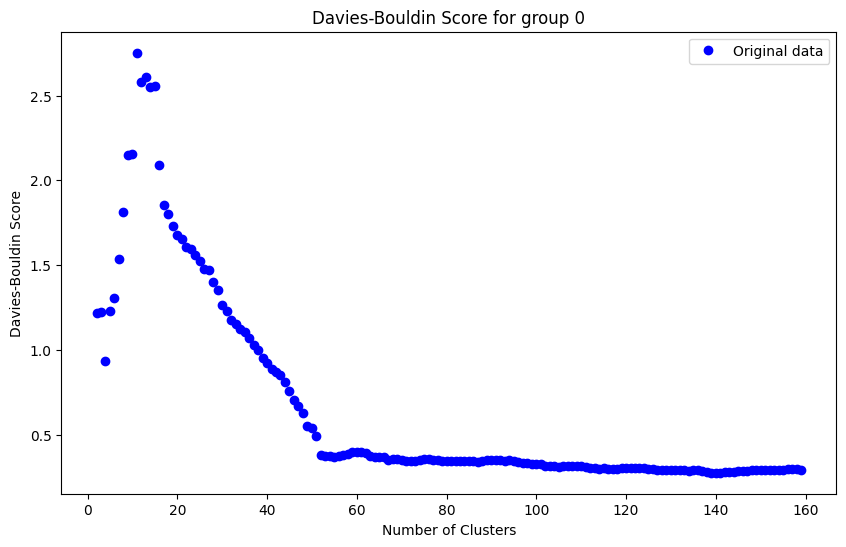

working on heuristic group: 1
(4000, 14)
calculating gowers distance matrix
clustering process...


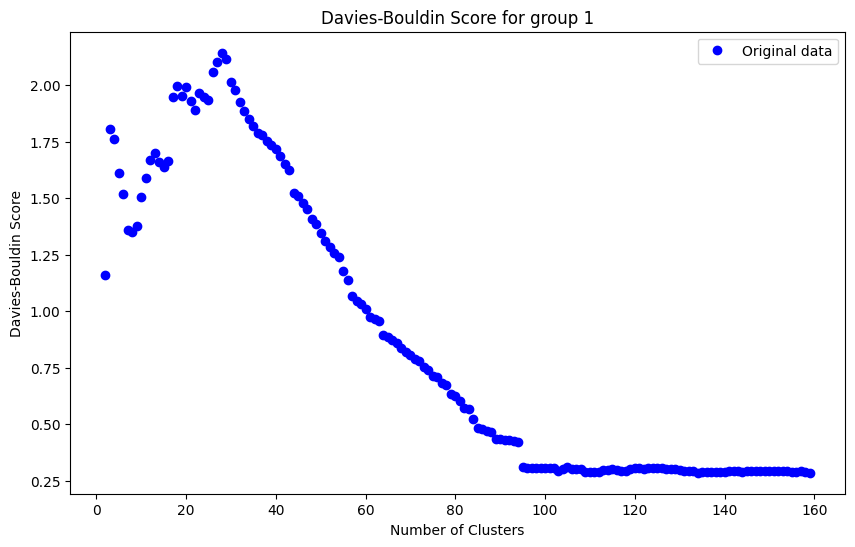

working on heuristic group: 2
(4000, 15)
calculating gowers distance matrix
clustering process...


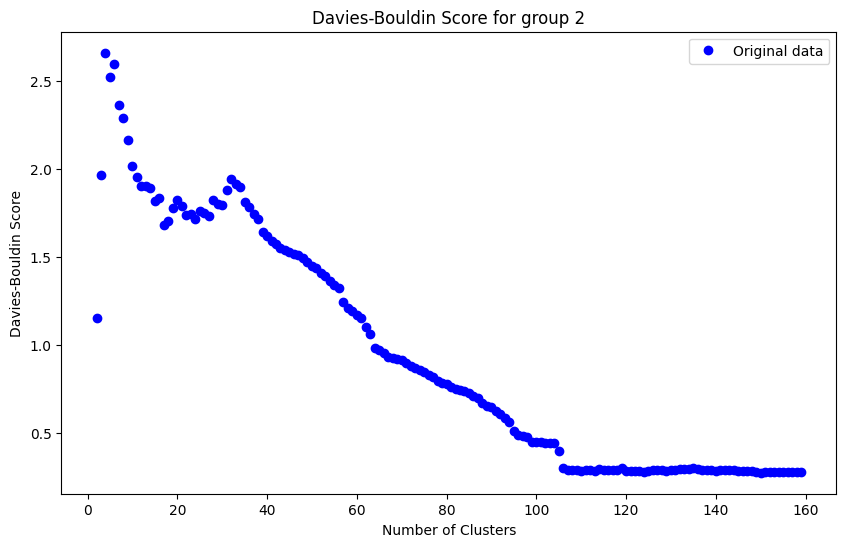

working on heuristic group: 3
(4000, 17)
calculating gowers distance matrix
clustering process...


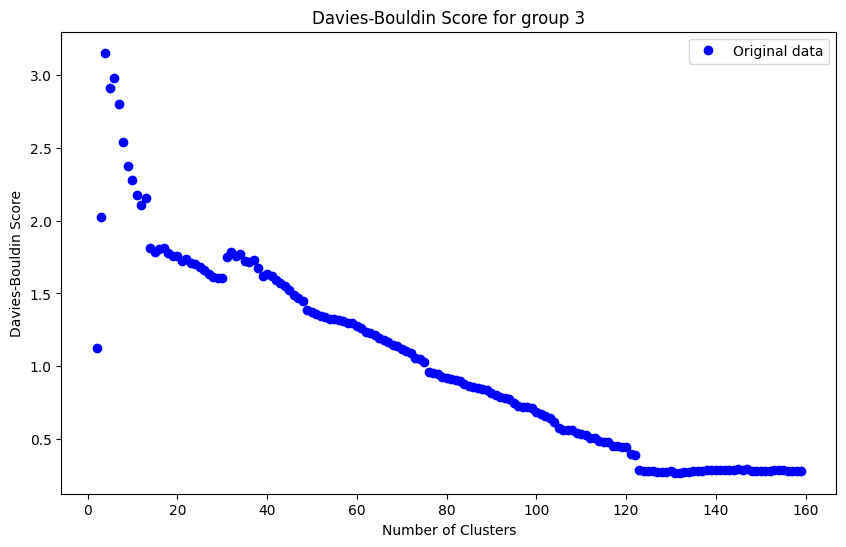

working on heuristic group: 4
(4000, 20)
calculating gowers distance matrix
clustering process...


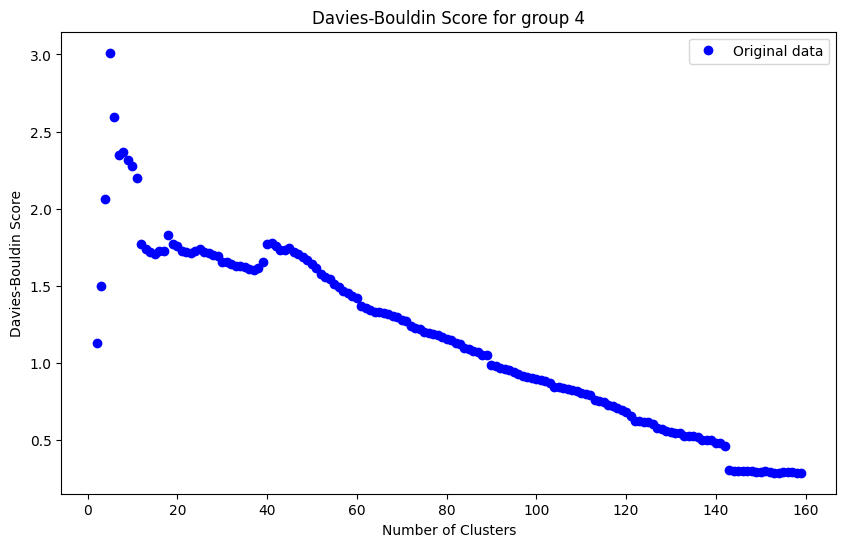

In [14]:
# actually perform heuristic featrue detection
all_heuristic_groups = [l4000, l3000, l2000, l1000, l600]
n_clusters_range = range(2, 160, 1)
all_davies_bouldin_scores = []
cluster_comparison_metrics = []
i = 0
for grp in all_heuristic_groups:
    print("working on heuristic group: " + str(i))
    davies_bouldin_scores = []
    df_heuristic = df_cleaned.copy()
    # remove rows that have values existing in the columns to be dropped. 
    for feature in grp:
        df_heuristic = df_heuristic[df_heuristic[feature] != 1]
    # only take 4000 rows for computational power sake
    df_heuristic = df_heuristic.head(4000)
    df_heuristic.drop(columns=grp, inplace=True)
    print(df_heuristic.shape)
    print("calculating gowers distance matrix")
    gowers_distance_matrix = gower_distance(df_heuristic)
    print("clustering process...")
    for n_clusters in n_clusters_range:
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
        clusters = agg_clustering.fit_predict(gowers_distance_matrix)
        # compute davies bouldin score for each cluster number from 1 to 160
        db_score = davies_bouldin_score(gowers_distance_matrix, clusters)
        davies_bouldin_scores.append(db_score)

    #plot the davies bouldin scores
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, davies_bouldin_scores, 'bo', label='Original data')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.title(f'Davies-Bouldin Score for group {i}')
    plt.legend()
    plt.show()
    
    all_davies_bouldin_scores.append(davies_bouldin_scores)
    i += 1



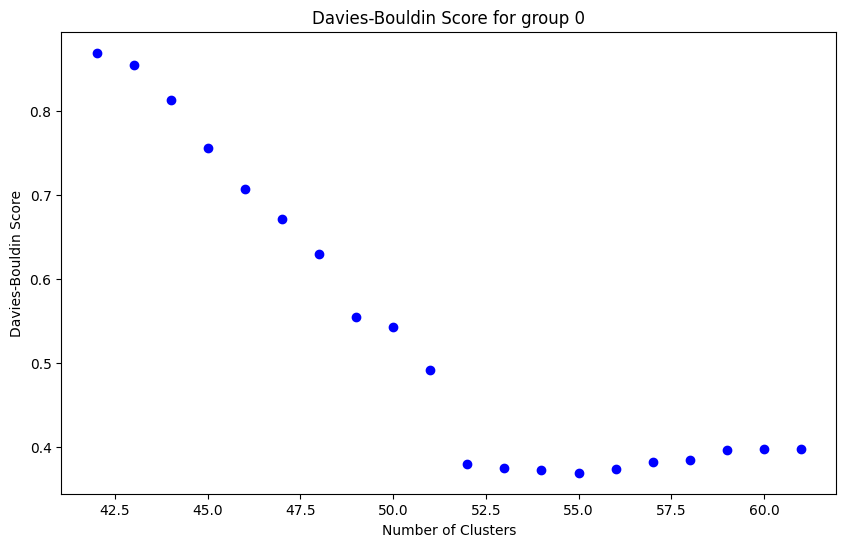

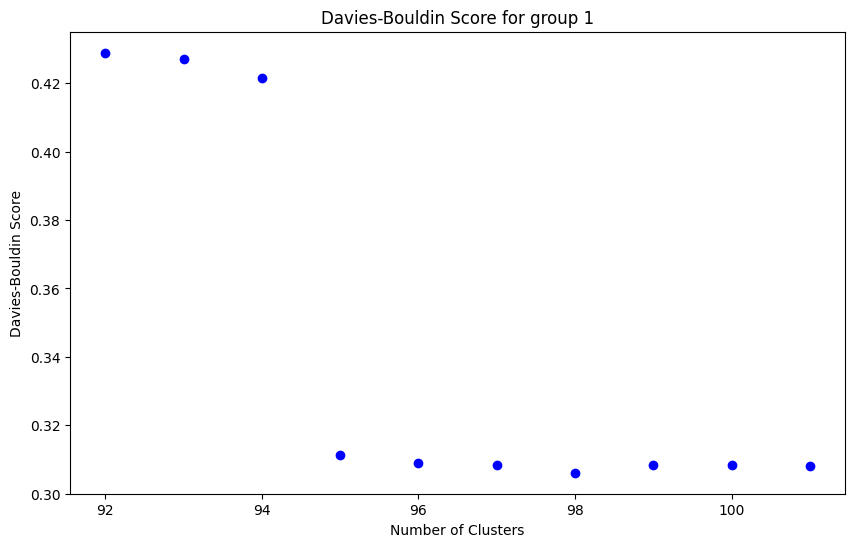

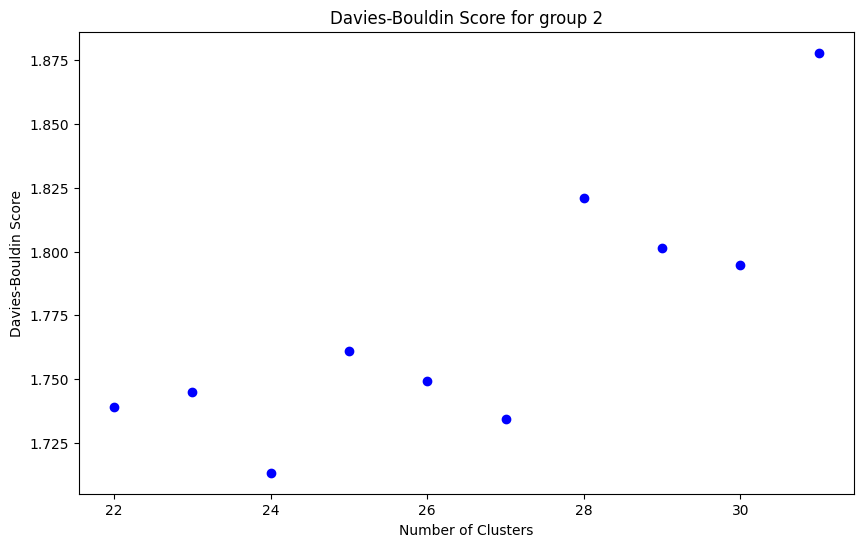

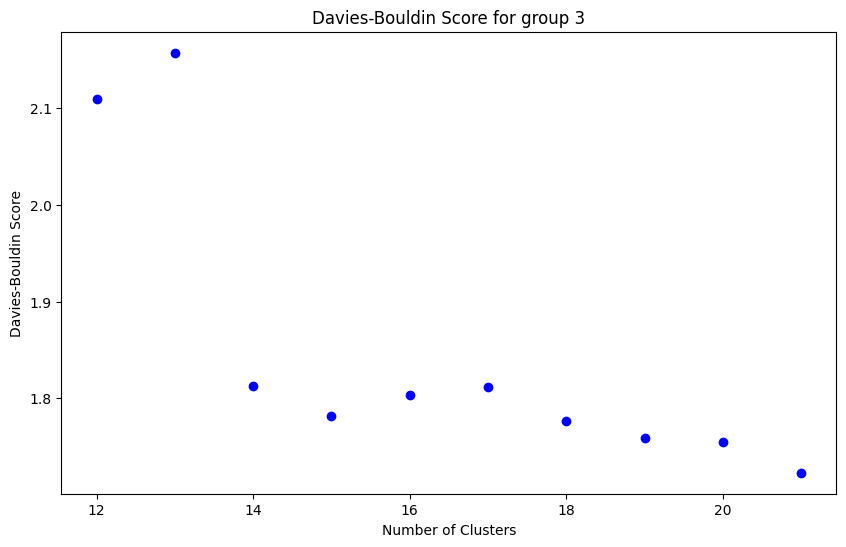

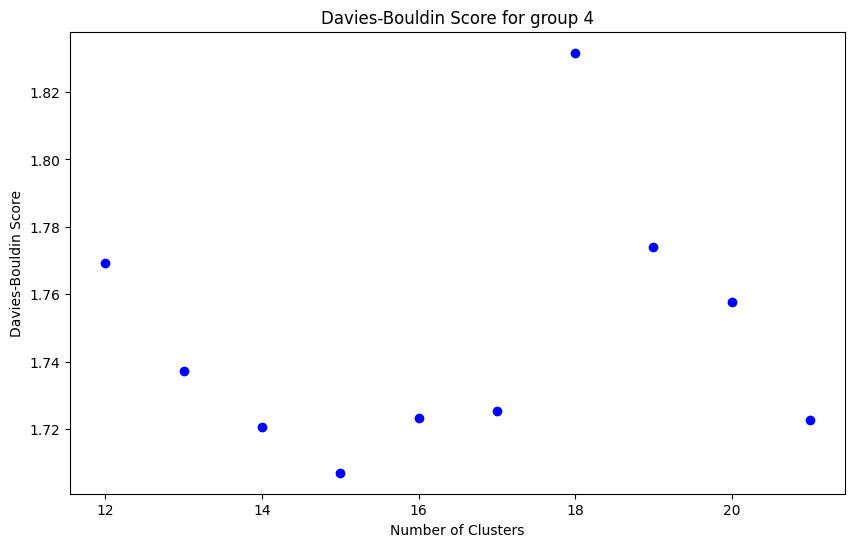

In [15]:
# observe closer at where the "elbow" points lie for each curve. 
l4000_closer_range = [40,60]
l3000_closer_range = [90,100]
l2000_closer_range = [20,30]
l1000_closer_range = [10,20]
l600_closer_range = [10,20]

all_closer_ranges = [l4000_closer_range, l3000_closer_range, l2000_closer_range, l1000_closer_range, l600_closer_range]

# observe closer ranges so we can definitively determine which point is the elbow point. 
for i in range(len(all_closer_ranges)):
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range[all_closer_ranges[i][0]:all_closer_ranges[i][1]], all_davies_bouldin_scores[i][all_closer_ranges[i][0]:all_closer_ranges[i][1]], 'bo', label='Original data')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.title(f'Davies-Bouldin Score for group {i}')
    plt.show()

In [16]:
# Elbow points values below by visual inspection:
group0_elbow = 52
group1_elbow = 95
group2_elbow = 24
group3_elbow = 14
group4_elbow = 15

#now we need to calculate the cluster comparison metric for each elbow point. 
group0_metric = all_davies_bouldin_scores[0][group0_elbow] * np.exp(group0_elbow)
group1_metric = all_davies_bouldin_scores[1][group1_elbow] * np.exp(group1_elbow)
group2_metric = all_davies_bouldin_scores[2][group2_elbow] * np.exp(group2_elbow)
group3_metric = all_davies_bouldin_scores[3][group3_elbow] * np.exp(group3_elbow)
group4_metric = all_davies_bouldin_scores[4][group4_elbow] * np.exp(group4_elbow)

print("group 0 metric: " +str(group0_metric))
print("group 1 metric: " +str(group1_metric))
print("group 2 metric: " +str(group2_metric))
print("group 3 metric: " +str(group3_metric))
print("group 4 metric: " +str(group4_metric))

group 0 metric: 1.4275994660538795e+22
group 1 metric: 5.584352766948303e+40
group 2 metric: 46336761922.08828
group 3 metric: 2169353.277397891
group 4 metric: 5640258.273133037


In [17]:
# we can see that group3 did best. group3 represents keeping all the occupation features with frequencies above 1000 So let's use that set of features for clustering. 

occupation_features_to_drop = l1000
df_cleaned_use = df_cleaned.copy()
for feature in occupation_features_to_drop:
    df_cleaned_use = df_cleaned_use[df_cleaned_use[feature] != 1]
df_cleaned_use.drop(columns=occupation_features_to_drop, inplace=True)
df_cleaned_use = df_cleaned_use.head(4000)
gowers_distance_matrix = gower_distance(df_cleaned_use)
# below, input the elbow point variable for the group that did the best
agg_clustering = AgglomerativeClustering(n_clusters=group3_elbow, metric='precomputed', linkage='average')
clusters = agg_clustering.fit_predict(gowers_distance_matrix)
df_cleaned_use['cluster_label'] = clusters

df_cleaned_use.head(15)

,education-num,sex_selfID,income_binary,Occupation__Adm-clerical,Occupation__Craft-repair,Occupation__Exec-managerial,Occupation__Handlers-cleaners,Occupation__Machine-op-inspct,Occupation__Other-service,Occupation__Prof-specialty,Occupation__Sales,Occupation__Transport-moving,Race__Amer-Indian-Inuit,Race__Asian-Pac-Islander,Race__Black,Race__Other,Race__White,cluster_label
0,1.119909,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3
1,1.119909,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,-0.441111,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12
3,-1.221621,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,12
4,1.119909,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,1.510164,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
6,-2.002131,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,10
7,-0.441111,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
8,1.510164,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9,1.119909,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [18]:
# for each cluster, the user can view the counts for each categorical column,
# and statistics for the numeric education_num column
cluster = 12

print("categorical feature frequencies in the cluster ---------------------------------------")
cluster_df = df_cleaned_use[df_cleaned_use['cluster_label'] == cluster]
cluster_df_categorical = cluster_df.drop(columns = ['education-num', 'cluster_label'])
cluster_frequencies = cluster_df_categorical.sum()
print(cluster_frequencies)

print("numeric feature stats: education-num ----------------------------------")
cluster_stats = cluster_df['education-num'].describe()
print(cluster_stats)



categorical feature frequencies in the cluster ---------------------------------------
sex_selfID                        23
income_binary                    169
Occupation__Adm-clerical           0
Occupation__Craft-repair           0
Occupation__Exec-managerial        0
Occupation__Handlers-cleaners    182
Occupation__Machine-op-inspct      0
Occupation__Other-service          0
Occupation__Prof-specialty         0
Occupation__Sales                  0
Occupation__Transport-moving       0
Race__Amer-Indian-Inuit            3
Race__Asian-Pac-Islander           0
Race__Black                       30
Race__Other                        0
Race__White                      149
dtype: int64
numeric feature stats: education-num ----------------------------------
count    182.000000
mean      -0.619084
std        0.783280
min       -2.782641
25%       -0.733802
50%       -0.441111
75%       -0.050856
max        1.119909
Name: education-num, dtype: float64
